### Lab 4
#### Author: Ceyda Durmaz
#### Date: 11/30/2020
##### Link to GitHub repository: https://github.com/cdurmaz569/Data_Science_I_Lab/tree/master/Lab_4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Problem 1

In [2]:
# Read in listings of Boston data
listings = pd.read_csv("listings.csv")

# Get how many entries are in listings
print("There are " + str(listings.shape[0]) + " listings in the dataset.")

# Get how many unique identifiers are in listings
print("There are " + str(listings.nunique()[0]) + " unique identifiers.")

There are 6264 listings in the dataset.
There are 6264 unique identifiers.


### Problem 2

In [3]:
# Read in reviews of Boston data
reviews = pd.read_csv("reviews.csv")

# Calculate how many entries are in listings
print("There are " + str(reviews.shape[0]) + " entries in the reviews dataset.")

# Calculate how many unique identifiers are in listings
print("There are " + str(reviews.nunique()[0]) + " unique identifiers.")

There are 225880 entries in the reviews dataset.
There are 5088 unique identifiers.


### Problem 3

In [4]:
# Merge review and listings so all entries from listings are in df
mergedAllListings = pd.merge(listings, reviews, 
                             left_on = "id", 
                             right_on = "listing_id", 
                             how = "left")

# Get number of rows 
print("After merging, there are " + str(mergedAllListings.shape[0]) + " rows.")

# Get number of unique AirBnB ids
print("There are " + str(mergedAllListings.nunique()["id_x"]) + " unique AirBnB ids.")

# Get number of rows filled with NaNs
print("There were " + str(sum(mergedAllListings.listing_id.isnull())) + " rows filled with NaN.")

After merging, there are 227056 rows.
There are 6264 unique AirBnB ids.
There were 1176 rows filled with NaN.


### Problem 4

In [5]:
# Merge review and listings so all entries from reviews are in df
mergedAllReviews = pd.merge(listings, reviews, 
                            left_on = "id", 
                            right_on = "listing_id", 
                            how = "right")

# Get number of rows
print("After merging, there are " + str(mergedAllReviews.shape[0]) + " rows.")

# Get number of unique AirBnB ids 
print("There are " + str(mergedAllReviews.nunique()["listing_id"]) + " unique AirBnB ids.")

After merging, there are 225880 rows.
There are 5088 unique AirBnB ids.


### Problem 5

In [6]:
# Subset superhosts
listingsSuper = listings[listings.host_is_superhost == "t"] 

# Get number of unique AirBnBs hosted by a superhost
print("There are " + str(listingsSuper.shape[0]) + " unique AirBnBs hosted by a superhost.")

# Get number of superhosts 
print("There are " + str(listingsSuper.nunique()["host_id"]) + " superhosts in Boston.")

# Get number of superhosts without reviews
mergedSuperReviews = pd.merge(listingsSuper, 
                              reviews, 
                              left_on = "id", 
                              right_on = "listing_id",
                              how = "left")
print("There are " + str(sum(mergedSuperReviews.listing_id.isnull())) + " superhosts without a review.")

# Get median number of reviews that a superhost has in the 'reviews' df
print("The median number of reviews for a superhost is " + str(listingsSuper["number_of_reviews"].median()) + ".")

There are 1448 unique AirBnBs hosted by a superhost.
There are 757 superhosts in Boston.
There are 70 superhosts without a review.
The median number of reviews for a superhost is 41.0.


### Problem 6

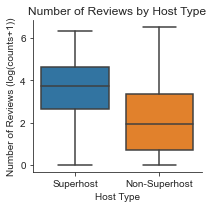

In [7]:
# Subset listings and remove rows where host_is_superhost classifier is NaN
hostReviews = listings[["host_id", "host_is_superhost", "number_of_reviews"]].dropna(subset = ["host_is_superhost"])

# Rename entries in host_is_superhost column
hostReviews["host_is_superhost"] = hostReviews["host_is_superhost"].replace({"t": "Superhost", "f": "Non-Superhost"})

# Add 1 to number of reviews
hostReviews["number_of_reviews"] = hostReviews["number_of_reviews"] + 1

# Log number of reviews
hostReviews["num_reviews_log"] = np.log(hostReviews["number_of_reviews"])

# Plot boxplot
sns.set_style("ticks")
grid = sns.FacetGrid(hostReviews)
sns.boxplot(data = hostReviews, 
            x = "host_is_superhost", 
            y = "num_reviews_log")
plt.title("Number of Reviews by Host Type")
plt.xlabel("Host Type")
plt.ylabel("Number of Reviews (log(counts+1))")
plt.tight_layout()